<center>
    
# Shynggys Babir
Python project
Project name: Climate Change: Earth Surface Temperature Data
Link to [dataset](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data)

In [1]:
# Importing the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py
import warnings
warnings.simplefilter('ignore')
np.set_printoptions(precision=2)

In [2]:
Global_temp = pd.read_csv('data/GlobalTemperatures.csv')
By_city = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')
Major_city = pd.read_csv('data/GlobalLandTemperaturesByMajorCity.csv')
By_state = pd.read_csv('data/GlobalLandTemperaturesByState.csv')
By_countries = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')

In [3]:
dataframes = {
    "Global_temp": Global_temp,
    "By_city": By_city,
    "Major_city": Major_city,
    "By_state": By_state,
    "By_countries": By_countries,
}

# Drop NaN values for all DataFrames
dataframes = {name: df.dropna() for name, df in dataframes.items()}

# Unpacking the cleaned DataFrames
Global_temp, By_city, Major_city, By_state, By_countries = dataframes.values()

In [4]:
dataframes = {name: df.dropna() for name, df in dataframes.items()}

# Display shapes after cleaning
for name, df in dataframes.items():
    print(f"{name} shape after dropping NaNs: {df.shape}")

Global_temp shape after dropping NaNs: (1992, 9)
By_city shape after dropping NaNs: (8235082, 7)
Major_city shape after dropping NaNs: (228175, 7)
By_state shape after dropping NaNs: (620027, 5)
By_countries shape after dropping NaNs: (544811, 4)


In [5]:
# Display data types of all DataFrames
for name, df in dataframes.items():
    print(f"Data types in {name}:\n{df.dtypes}\n")

Data types in Global_temp:
dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

Data types in By_city:
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object

Data types in Major_city:
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City   

# EDA

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
avg_tem_cont = By_city.groupby('Country')['AverageTemperature'].mean().reset_index()
avg_tem_cont.head(5)

Country  AverageTemperature
0  Afghanistan               13.82
1      Albania               15.53
2      Algeria               17.76
3       Angola               21.76
4    Argentina               17.00

In [7]:
Global_temp.head(3)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200  1850-01-01                    0.75                               1.10   
1201  1850-02-01                    3.07                               1.27   
1202  1850-03-01                    4.95                               0.95   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200                8.24                           1.74               -3.21   
1201                9.97                           3.01               -2.29   
1202               10.35                           2.40               -1.91   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                           2.82                           12.83   
1201                           1.62                           13.59   
1202                           1.41                           14.04   

      LandAndOceanAverageTemperatureUncertainty  
1200                                       0.37  
1201                                       0.41  
1202                                       0.34

In [8]:
By_city.head(3)

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01                6.07                           1.74  Århus   
5  1744-04-01                5.79                           3.62  Århus   
6  1744-05-01               10.64                           1.28  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
5  Denmark   57.05N    10.33E  
6  Denmark   57.05N    10.33E

In [9]:
Major_city.head(3)

dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01               26.70                           1.44  Abidjan   
1  1849-02-01               27.43                           1.36  Abidjan   
2  1849-03-01               28.10                           1.61  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W

In [10]:
By_state.head(3)

dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01               25.54                           1.17  Acre  Brazil
1  1855-06-01               24.23                           1.10  Acre  Brazil
2  1855-07-01               24.37                           1.04  Acre  Brazil

In [11]:
By_countries.head(3)

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01                4.38                           2.29   Åland
5  1744-04-01                1.53                           4.68   Åland
6  1744-05-01                6.70                           1.79   Åland

In [12]:
country_avg_temp = By_countries.groupby('Country')['AverageTemperature'].mean().reset_index()
country_avg_temp.columns = ['Country', 'AverageTemperature']
print("\nAverage Temperature by Country:")
print(country_avg_temp.sort_values(by='AverageTemperature', ascending=False).head(10))  # Display top 10 countries


Average Temperature by Country:
                  Country  AverageTemperature
59               Djibouti               28.82
134                  Mali               28.44
33           Burkina Faso               28.08
191               Senegal               27.97
11                  Aruba               27.92
228  United Arab Emirates               27.69
137            Mauritania               27.62
81                 Gambia               27.54
155                 Niger               27.46
53                Curaçao               27.35


In [13]:
state_avg_temp = By_state.groupby('State')['AverageTemperature'].mean().reset_index()
state_avg_temp.columns = ['State', 'AverageTemperature']
print("\nAverage Temperature by State:")
print(state_avg_temp.sort_values(by='AverageTemperature', ascending=False).head(10))  # Display top 10 states


Average Temperature by State:
                   State  AverageTemperature
168           Puducherry               27.27
10   Andaman And Nicobar               27.23
11        Andhra Pradesh               27.09
175  Rio Grande Do Norte               27.01
200           Tamil Nadu               26.67
90                Kerala               26.32
57               Gujarat               26.30
42         Daman And Diu               26.27
8               Amazonas               26.13
109          Maharashtra               25.93


In [14]:
# Convert 'dt' to datetime and extract the year
Global_temp['dt'] = pd.to_datetime(Global_temp['dt'])
Global_temp['Year'] = Global_temp['dt'].dt.year

# Group by year and calculate the mean temperature
global_temp_by_year = Global_temp.groupby('Year')['LandAverageTemperature'].mean()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_temp_by_year.index, y=global_temp_by_year.values, color='orange', label='Global Avg Temperature')
plt.title('Global Average Temperature Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid()
plt.legend()
plt.show()

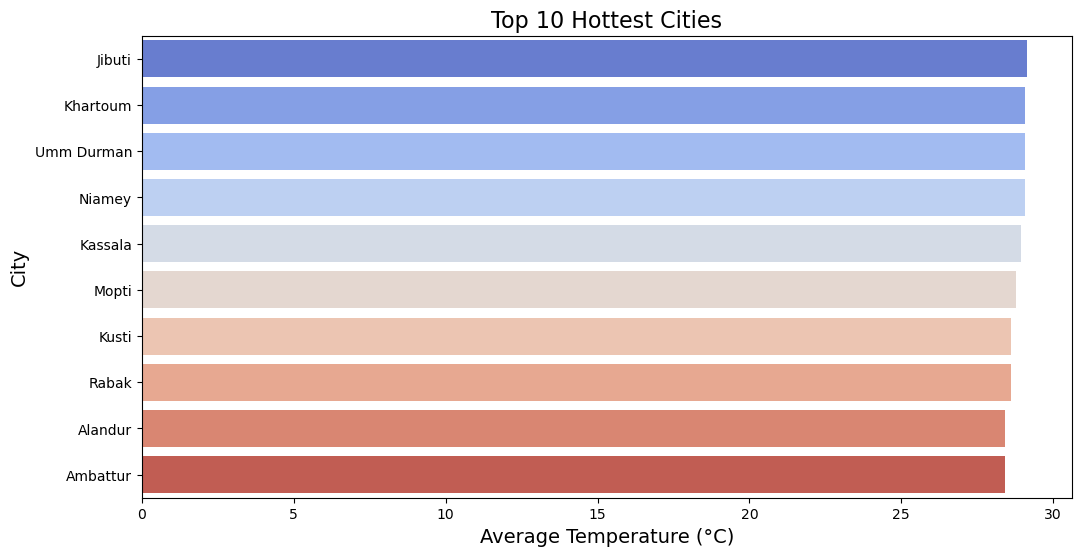

In [15]:
# Group by city and calculate the mean temperature
city_avg_temp = By_city.groupby('City')['AverageTemperature'].mean().dropna()

# Get the top 10 hottest cities
top_10_cities = city_avg_temp.nlargest(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='coolwarm')
plt.title('Top 10 Hottest Cities', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()


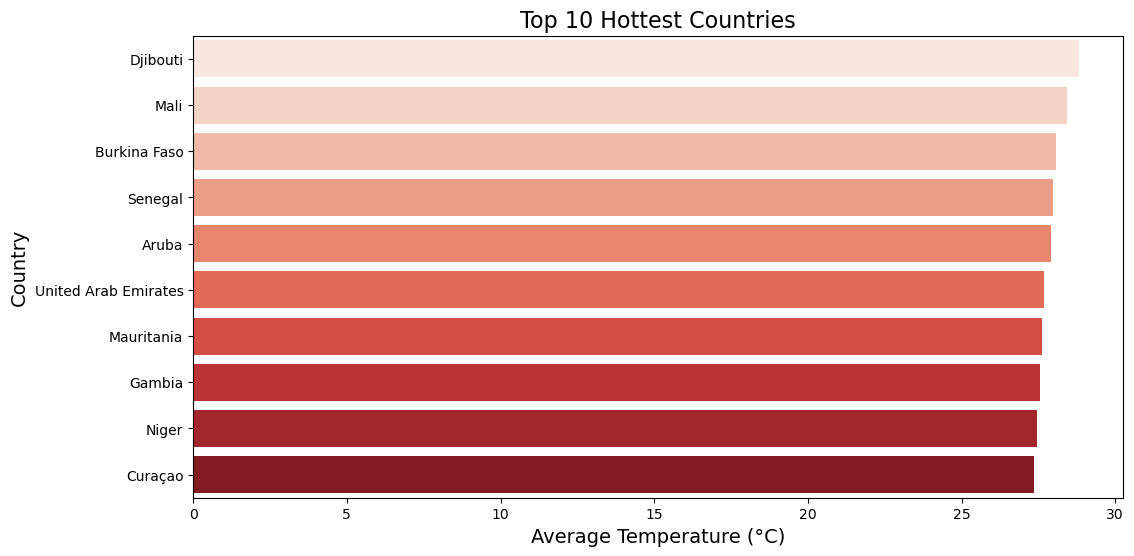

In [16]:
# Load data
By_countries = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')

# Group by country and calculate the mean temperature
country_avg_temp = By_countries.groupby('Country')['AverageTemperature'].mean().dropna()

# Get the top 10 hottest countries
top_10_countries = country_avg_temp.nlargest(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='Reds')
plt.title('Top 10 Hottest Countries', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()


In [17]:
# Extract the month
Global_temp['Month'] = Global_temp['dt'].dt.month

# Group by month and calculate mean temperature
global_temp_by_month = Global_temp.groupby('Month')['LandAverageTemperature'].mean()

# Plot the data
plt.figure(figsize=(10, 5))
sns.barplot(x=global_temp_by_month.index, y=global_temp_by_month.values, palette='Blues')
plt.title('Average Global Land Temperature by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


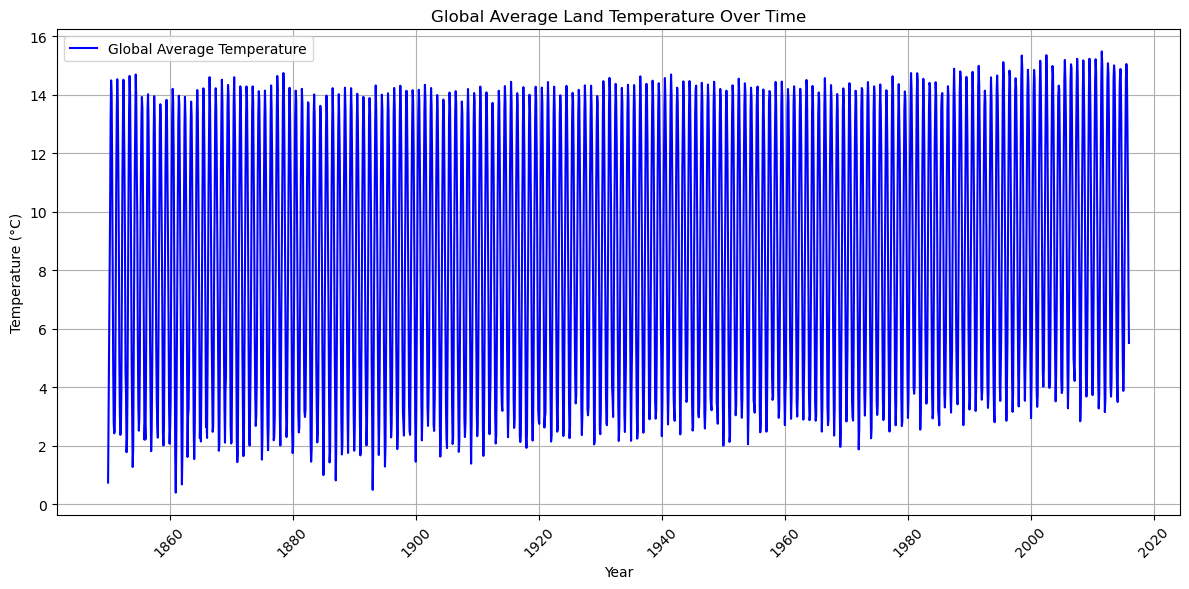

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(Global_temp['dt'], Global_temp['LandAverageTemperature'], label='Global Average Temperature', color='blue')
plt.title('Global Average Land Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

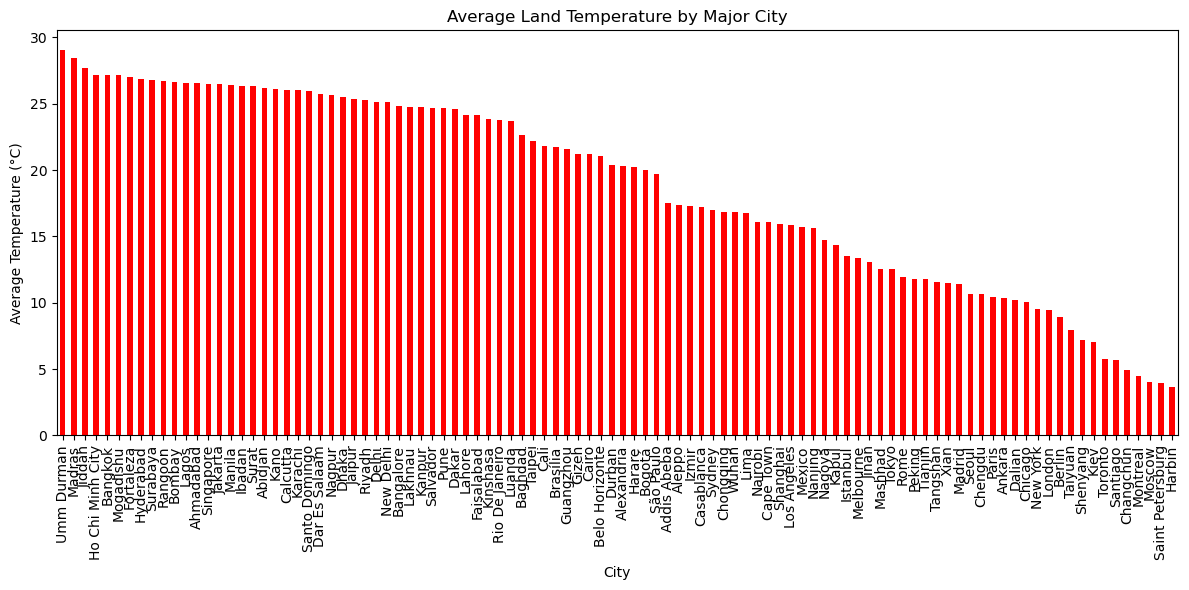

In [19]:
major_city_avg_temp = Major_city.groupby('City')['AverageTemperature'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
major_city_avg_temp.plot(kind='bar', color='red')
plt.title('Average Land Temperature by Major City')
plt.xlabel('City')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
global_avg_temp_summary = Global_temp['LandAverageTemperature'].describe()
print("Global Average Temperature Summary:")
print(global_avg_temp_summary)

Global Average Temperature Summary:
count   1,992.00
mean        8.57
std         4.26
min         0.40
25%         4.43
50%         8.85
75%        12.86
max        15.48
Name: LandAverageTemperature, dtype: float64


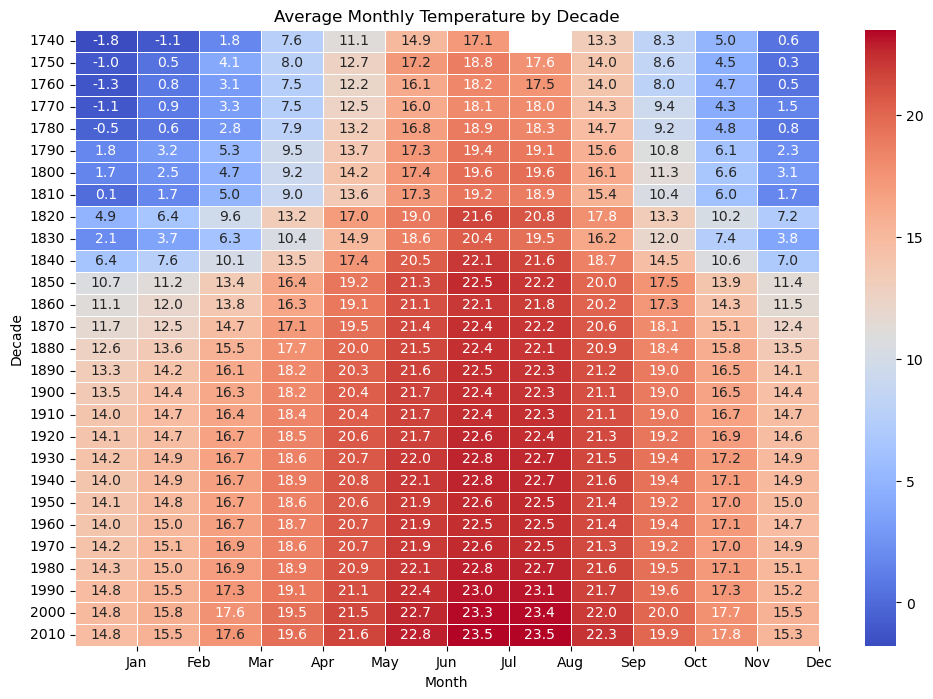

In [21]:
# Convert 'dt' to datetime and extract year and month
By_countries['dt'] = pd.to_datetime(By_countries['dt'])
By_countries['Year'] = By_countries['dt'].dt.year
By_countries['Month'] = By_countries['dt'].dt.month

# Create a new column for decade
By_countries['Decade'] = (By_countries['Year'] // 10) * 10

# Calculate average temperature by decade and month
heatmap_data = By_countries.groupby(['Decade', 'Month'])['AverageTemperature'].mean().unstack()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)

# Customize the plot
plt.title('Average Monthly Temperature by Decade')
plt.xlabel('Month')
plt.ylabel('Decade')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Using Geopandas

In [22]:
pip install geopandas

In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
world = gpd.read_file('110m_cultural.zip')

# Group temperature data by country and calculate mean temperature
temp_by_country = By_countries.groupby('Country')['AverageTemperature'].mean().reset_index()

# Merge the shapefile with temperature data
world = world.merge(temp_by_country, left_on='NAME', right_on='Country', how='left')

# Plot the map
plt.figure(figsize=(15, 10))
world.plot(column='AverageTemperature', cmap='coolwarm', legend=True, 
           missing_kwds={'color': 'lightgrey'})
plt.title('Global Average Land Temperature by Country', fontsize=15)
plt.axis('off')
plt.show()

<Figure size 1500x1000 with 0 Axes>

In [25]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [26]:
import geopandas as gpd
import pandas as pd
import folium
from IPython.display import display, HTML

# Load the shapefile (countries) from the zip file
world = gpd.read_file('110m_cultural.zip')

# Load the temperature data
By_countries = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')

# Group by country and calculate average temperature
country_avg_temp = By_countries.groupby('Country')['AverageTemperature'].mean().reset_index()

# Merge temperature data with GeoPandas shapefile
world_temp = world.merge(country_avg_temp, left_on='NAME', right_on='Country', how='left')

# Initialize a Folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add GeoJSON data to the map
folium.Choropleth(
    geo_data=world_temp.to_crs("EPSG:4326").__geo_interface__,
    name='choropleth',
    data=country_avg_temp,
    columns=['Country', 'AverageTemperature'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Land Temperature (°C)'
).add_to(m)

# Add tooltips to display country names and temperatures
folium.GeoJson(
    world_temp,
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'AverageTemperature'],
        aliases=['Country', 'Average Temp (°C)'],
        localize=True
    )
).add_to(m)

# Display the map directly in Jupyter Notebook
display(m)